# Machine Learning Fundamentals: Cross Validation

Cross Validation is a pivotal step in the machine learning pipeline. It helps us understand how well our model will generalize to unseen data. In this notebook, we will dive deep into understanding and implementing Cross Validation. 

![Cross Validation](https://miro.medium.com/max/1200/1*rgba1BIOUys7wQcXcL4U5A.png)

_Image Source: [Medium](https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f)_

So let's start by importing the necessary libraries.

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## Understanding the Data

For the purpose of this demonstration, we will be using the Iris dataset which is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the lengths and the widths of the sepals and petals, in centimeters.

Let's load the data and understand it.

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

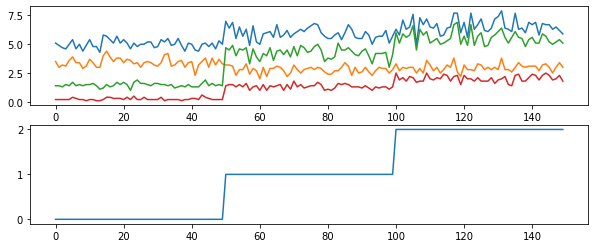

In [19]:
plt.figure(figsize=(10, 4))
plt.subplot(2,1,1)
plt.plot(X[:,0])
plt.plot(X[:,1])
plt.plot(X[:,2])
plt.plot(X[:,3])
plt.subplot(2,1,2)
plt.plot(y)


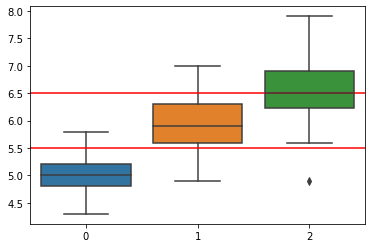

In [29]:
import seaborn as sns
sns.boxplot( [ X[y==0,0], X[y==1,0], X[y==2,0] ] )
plt.axhline(5.5, c='red')
plt.axhline(6.5, c='red')
plt.show()


## Implementing Cross Validation

Now let's implement a basic train-test split and apply Cross Validation on it. We will start with 5 fold cross validation and we will use three different models (Logistic Regression, K Nearest Neighbors and Support Vector Machines) for this purpose.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear')

models = [logreg, knn, svm]
model_names = ['Logistic Regression', 'K Nearest Neighbors', 'Support Vector Machines']

for i, model in enumerate(models):
    cv_score = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{model_names[i]} Average Score: {np.mean(cv_score)}')

Logistic Regression Average Score: 0.9666666666666666
K Nearest Neighbors Average Score: 0.9416666666666667
Support Vector Machines Average Score: 0.9583333333333334


/Users/amirhosseindaraie/miniconda3/envs/my_base/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/amirhosseindaraie/miniconda3/envs/my_base/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

From the above output, we can observe that all three models perform well on the Iris dataset. We can select the model with the highest Cross-Validation score.

## Understanding the number of folds

In the above example, we used a 5-fold cross-validation. However, the number of folds is arbitrary and can be tuned. In an extreme case, we could call each individual data point a block. This is called "Leave One Out Cross Validation". Each sample is tested individually. That said in practice it is very common to divide the data into ten blocks. This is called 10-fold cross-validation.

## Tuning Parameters using Cross Validation

Cross Validation can also be used to tune the hyperparameters of our model. We can use GridSearchCV or RandomizedSearchCV to tune our hyperparameters using Cross Validation.

## References

1. [StatQuest: Cross Validation, Clearly Explained](https://www.youtube.com/watch?v=fSytzGwwBVw)
2. [Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html)
3. [Wikipedia: Cross-validation (statistics)](https://en.wikipedia.org/wiki/Cross-validation_(statistics))
4. [Cross Validation in Machine Learning](https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f)